In [1]:
import pandas as pd

df_f1_part1 = pd.read_csv('f1_part1.csv')
df_f1_part2 = pd.read_csv('f1_part2.csv')
df_f2_part1 = pd.read_csv('f2_part1.csv')
df_f2_part2 = pd.read_csv('f2_part2.csv')
combined_df = pd.concat([df_f1_part1, df_f1_part2, df_f2_part1, df_f2_part2], ignore_index=True)

print("Columns of the combined DataFrame:")
print(combined_df.columns)

Columns of the combined DataFrame:
Index(['timestamp_call_key', 'retailer_code', 'serial', 'reason', 'mos',
       'resolved', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'delinquency_history_13_march',
       'account_open_date_13_march', 'account_status_13_march',
       'card_activation_status_13_march', 'eservice_ind_13_march',
       'ebill_enrolled_status_13_march', 'auto_pay_enrolled_status_13_march',
       'no_of_accounts_with_syf_18_march', 'account_balance_18_march',
       'delinquency_history_18_march', 'account_open_date_18_march',
       'account_status_18_march', 'card_activation_status_18_march',
       'eservice_ind_18_march', 'ebill_enrolled_status_18_march',
       'auto_pay_enrolled_status_18_march'],
      dtype='object')


In [2]:
combined_df.shape

(1798798, 24)

In [3]:
nan_counts = combined_df.isna().sum()

print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
timestamp_call_key                         0
retailer_code                              0
serial                                     0
reason                                     0
mos                                        0
resolved                                   0
no_of_accounts_with_syf_13_march        3400
account_balance_13_march              113782
delinquency_history_13_march               0
account_open_date_13_march                 0
account_status_13_march              1732768
card_activation_status_13_march            0
eservice_ind_13_march                      0
ebill_enrolled_status_13_march          4936
auto_pay_enrolled_status_13_march          0
no_of_accounts_with_syf_18_march        3402
account_balance_18_march              101829
delinquency_history_18_march               0
account_open_date_18_march                 0
account_status_18_march              1703450
card_activation_status_18_march            0
eservice_ind_18_ma

In [4]:
combined_df["mos"].unique()
len(combined_df) - len(combined_df["serial"].unique())

290795

In [5]:
reason_codes = combined_df['mos'].str.split()
unique_reasons = set(reason for sublist in reason_codes for reason in sublist)

In [6]:
from scipy.stats import chi2_contingency

categorical_variable = combined_df['reason']
binary_variable = combined_df['resolved']

chi2, p_value_chi2, _, _ = chi2_contingency(pd.crosstab(categorical_variable, binary_variable))
print("Chi-square test p-value:", p_value_chi2)

Chi-square test p-value: 0.0


In [7]:

cross_tab = pd.crosstab(categorical_variable, binary_variable)
print("Contingency table (Cross-tabulation):")
print(cross_tab)

Contingency table (Cross-tabulation):
resolved   floor  resolved
reason                    
AA         15089     39772
AP          4541      2188
AT          8687     82717
AU             9         7
BA        158394    407957
...          ...       ...
mo             1         0
mp          5426      2188
mt             3         2
ss             1         0
wa         13248      1048

[73 rows x 2 columns]


In [8]:
data = combined_df[['reason', 'resolved']]

In [9]:
resolved_counts = data[data['resolved'] == 'resolved'].groupby('reason').size().reset_index(name='resolved_count')
unresolved_counts = data[data['resolved'] == 'floor'].groupby('reason').size().reset_index(name='unresolved_count')
print(resolved_counts)

   reason  resolved_count
0      AA           39772
1      AP            2188
2      AT           82717
3      AU               7
4      BA          407957
..    ...             ...
63     mm               1
64     mn            1226
65     mp            2188
66     mt               2
67     wa            1048

[68 rows x 2 columns]


In [10]:
combined_counts = pd.concat([resolved_counts.set_index('reason'), unresolved_counts.set_index('reason')], axis=1)
combined_counts.fillna(0, inplace=True)

In [11]:
tr_rows = combined_counts[combined_counts.index == 'ss']
print(tr_rows)

        resolved_count  unresolved_count
reason                                  
ss                 0.0               1.0


In [12]:
combined_counts['unresolved_to_total_ratio'] = combined_counts['unresolved_count'] / (combined_counts['resolved_count'] + combined_counts['unresolved_count'])

print("Ratio of unresolved to total for each reason category:")
print(combined_counts)

Ratio of unresolved to total for each reason category:
        resolved_count  unresolved_count  unresolved_to_total_ratio
reason                                                             
AA             39772.0           15089.0                   0.275041
AP              2188.0            4541.0                   0.674840
AT             82717.0            8687.0                   0.095040
AU                 7.0               9.0                   0.562500
BA            407957.0          158394.0                   0.279675
...                ...               ...                        ...
HI                 0.0               1.0                   1.000000
NU                 0.0               2.0                   1.000000
RS                 0.0              72.0                   1.000000
mo                 0.0               1.0                   1.000000
ss                 0.0               1.0                   1.000000

[73 rows x 3 columns]


In [13]:
combined_counts_sorted = combined_counts.sort_values(by='unresolved_to_total_ratio', ascending=False)

print("Sorted DataFrame by unresolved_to_total_ratio (descending):")
combined_counts_sorted.head(50)

Sorted DataFrame by unresolved_to_total_ratio (descending):


,resolved_count,unresolved_count,unresolved_to_total_ratio
reason,,,
ss,0.0,1.0,1.000000
NU,0.0,2.0,1.000000
mo,0.0,1.0,1.000000
RS,0.0,72.0,1.000000
HI,0.0,1.0,1.000000
DP,102.0,6828.0,0.985281
LW,1.0,57.0,0.982759
DE,7.0,275.0,0.975177
CS,2.0,69.0,0.971831


In [14]:

unresolved_count_gt_4000 = combined_counts_sorted[(combined_counts_sorted['unresolved_count'] > 4000)]

print("Rows where unresolved_count is greater than 1000:")
unresolved_count_gt_4000.head(20)

Rows where unresolved_count is greater than 1000:


,resolved_count,unresolved_count,unresolved_to_total_ratio
reason,,,
DP,102.0,6828.0,0.985281
CT,714.0,23082.0,0.969995
FD,533.0,12474.0,0.959022
FM,300.0,4455.0,0.936909
wa,1048.0,13248.0,0.926693
LC,2494.0,7582.0,0.752481
mp,2188.0,5426.0,0.712635
LS,4283.0,9482.0,0.688849
Pd,2265.0,4860.0,0.682105


In [15]:
reasons = unresolved_count_gt_4000.index

# plots for resolved vs unresolved

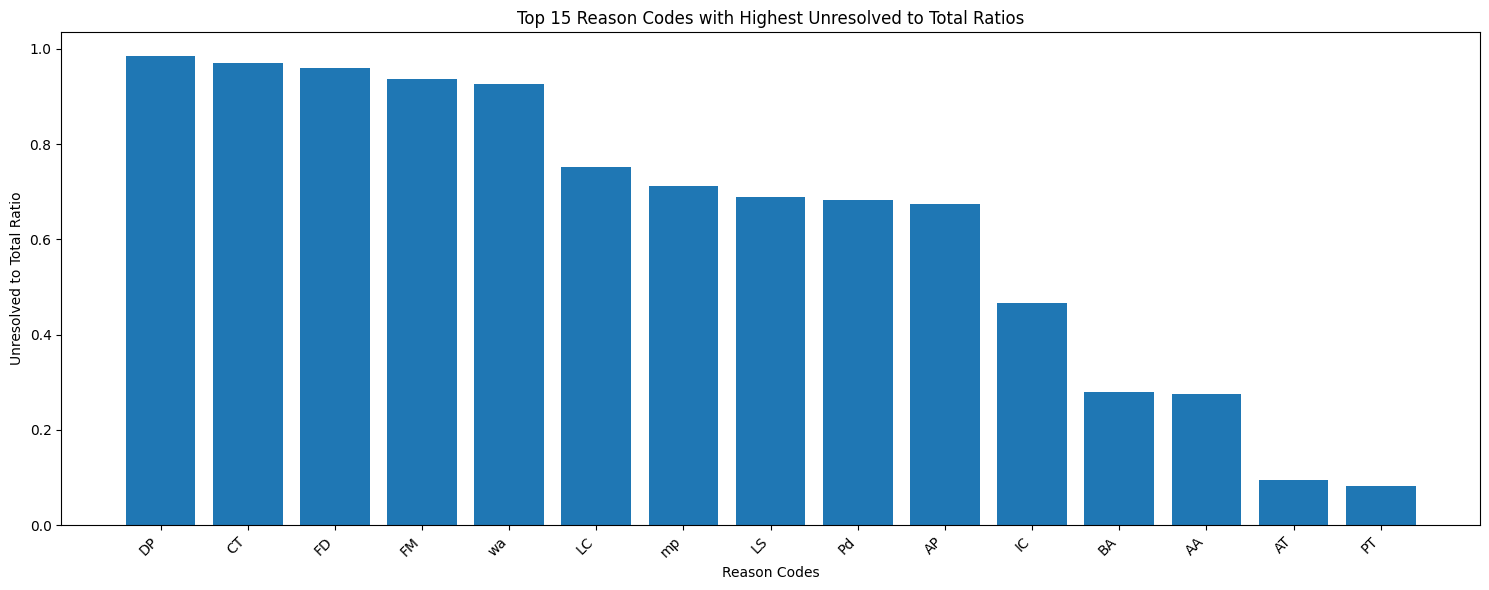

In [16]:
import matplotlib.pyplot as plt

combined_counts_sorted_by_ratio = unresolved_count_gt_4000.sort_values(by='unresolved_to_total_ratio', ascending=False)

num = 15
plt.figure(figsize=(num, 6))
plt.bar(combined_counts_sorted_by_ratio.index[:num], combined_counts_sorted_by_ratio['unresolved_to_total_ratio'][:num])
plt.xlabel('Reason Codes')
plt.ylabel('Unresolved to Total Ratio')
plt.title('Top ' + str(num) + ' Reason Codes with Highest Unresolved to Total Ratios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

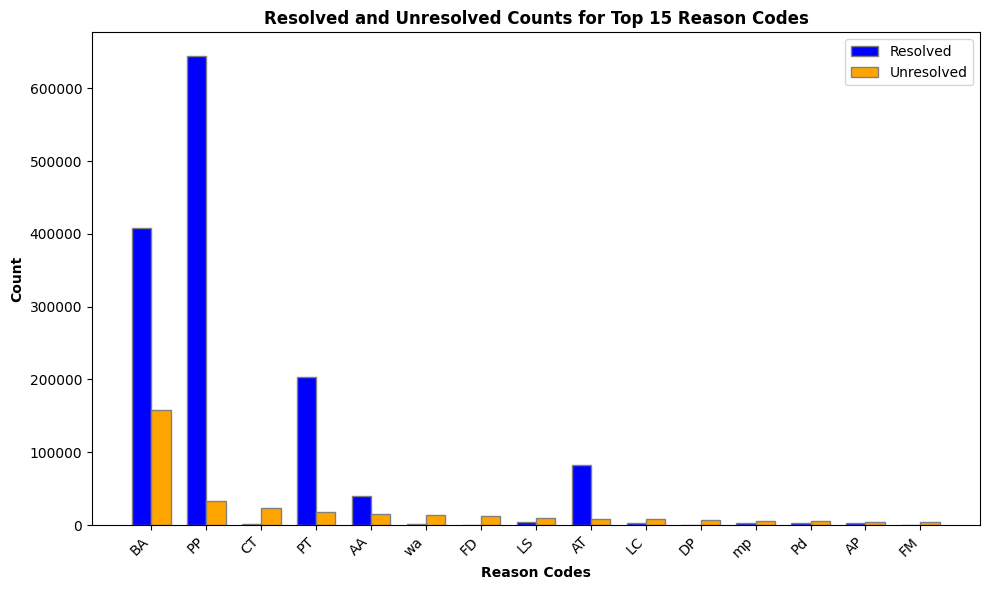

In [17]:
import numpy as np

combined_counts_sorted_by_count = unresolved_count_gt_4000.sort_values(by='unresolved_count', ascending=False)

num_reason_codes = 15
reason_codes = combined_counts_sorted_by_count.index[:num_reason_codes]
resolved_counts = combined_counts_sorted_by_count['resolved_count'][:num_reason_codes]
unresolved_counts = combined_counts_sorted_by_count['unresolved_count'][:num_reason_codes]

bar_width = 0.35
r1 = np.arange(len(reason_codes))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, resolved_counts, color='blue', width=bar_width, edgecolor='grey', label='Resolved')
plt.bar(r2, unresolved_counts, color='orange', width=bar_width, edgecolor='grey', label='Unresolved')

plt.xlabel('Reason Codes', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Resolved and Unresolved Counts for Top ' + str(num_reason_codes) + ' Reason Codes', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(reason_codes))], reason_codes, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Associations With Reason

In [18]:
df = combined_df.copy()

In [19]:
for reason in reasons:
    df[f'{reason}_flag'] = (df['reason'] == reason).astype(int)

In [20]:
df['acc_changed_flag'] = combined_df['no_of_accounts_with_syf_13_march'] != combined_df['no_of_accounts_with_syf_18_march']

In [21]:
df['card_activation_changed'] = combined_df['card_activation_status_13_march'] != combined_df['card_activation_status_18_march']

In [22]:
df['delinquency_changed'] = combined_df['delinquency_history_13_march'] != combined_df['delinquency_history_18_march']

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.utils import resample

def cramers_v(x, y):
    """
    Calculate Cramer's V for two categorical variables.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(np.sqrt(chi2 / (n * min_dim)))


predictor = 'acc_changed_flag'


positive_samples = df[df[predictor] == True]
negative_samples = df[df[predictor] == False]

minority_class_size = min(len(positive_samples), len(negative_samples))
positive_downsampled = resample(positive_samples, replace=False, n_samples=minority_class_size)
negative_downsampled = resample(negative_samples, replace=False, n_samples=minority_class_size)

balanced_data = pd.concat([positive_downsampled, negative_downsampled])

cramer_v_score = cramers_v(balanced_data['reason'], balanced_data[predictor])
print(f"Cramer's V Score OVERALL: {cramer_v_score}")

Cramer's V Score OVERALL: 0.6263849842127557


In [24]:
fixed_attributes = ['acc_changed_flag']

In [25]:
import seaborn as sns
cramer_v_scores = []

for attribute in fixed_attributes:
    for reason in reasons:
        positive_samples = df[df[predictor] == True]
        negative_samples = df[df[predictor] == False]
        
        minority_class_size = min(len(positive_samples), len(negative_samples))
        positive_downsampled = resample(positive_samples, replace=False, n_samples=minority_class_size)
        negative_downsampled = resample(negative_samples, replace=False, n_samples=minority_class_size)
        
        balanced_data = pd.concat([positive_downsampled, negative_downsampled])
        
        cramer_v_score = cramers_v(balanced_data[f'{reason}_flag'], balanced_data[predictor])
        cramer_v_scores.append((reason, cramer_v_score))

cramer_v_scores_df = pd.DataFrame(cramer_v_scores, columns=['Reason', 'Cramer\'s V Score'])

In [26]:
def calculate_cramers_v(reason, predictor):
    positive_samples = df[df[predictor] == True]
    negative_samples = df[df[predictor] == False]
    
    minority_class_size = min(len(positive_samples), len(negative_samples))
    positive_downsampled = resample(positive_samples, replace=False, n_samples=minority_class_size)
    negative_downsampled = resample(negative_samples, replace=False, n_samples=minority_class_size)
    
    balanced_data = pd.concat([positive_downsampled, negative_downsampled])
    
    cramer_v_score = cramers_v(balanced_data[f'{reason}_flag'], balanced_data[predictor])
    return cramer_v_score

In [27]:
fixed_attributes = ["acc_changed_flag",'card_activation_changed','delinquency_changed' ]

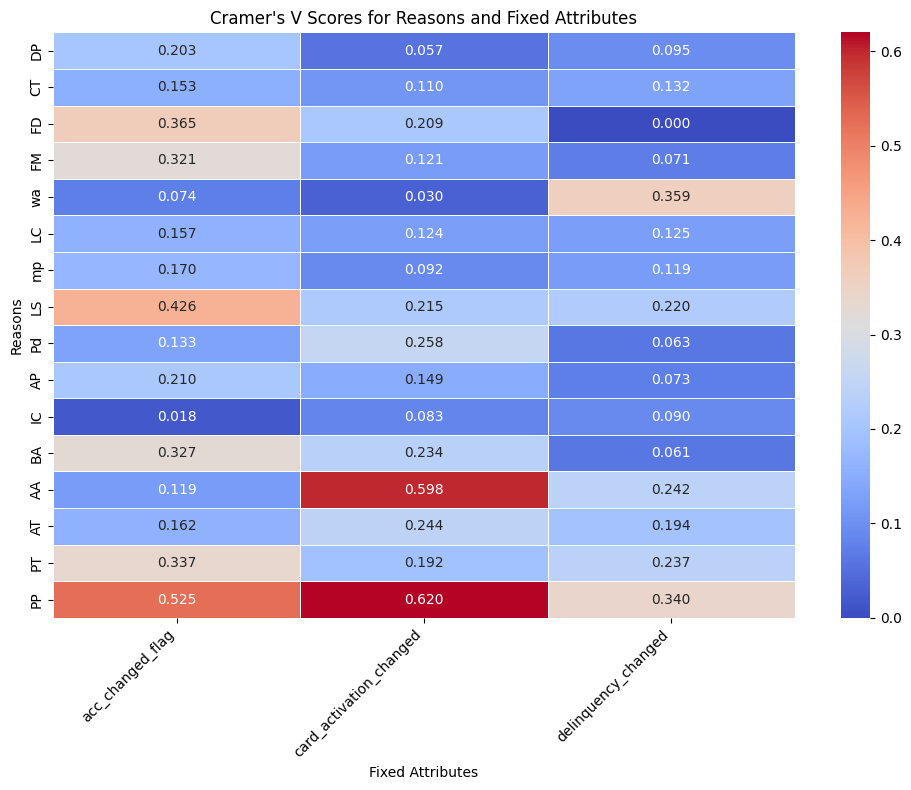

In [28]:
heatmap_data = pd.DataFrame(index=reasons)

for predictor in fixed_attributes:
    cramer_v_scores = []
    for reason in reasons:
        cramer_v_score = calculate_cramers_v(reason, predictor)  
        cramer_v_scores.append(cramer_v_score)
    heatmap_data[predictor] = cramer_v_scores

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".3f", linewidths=0.5)
plt.title("Cramer's V Scores for Reasons and Fixed Attributes")
plt.xlabel("Fixed Attributes")
plt.ylabel("Reasons")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

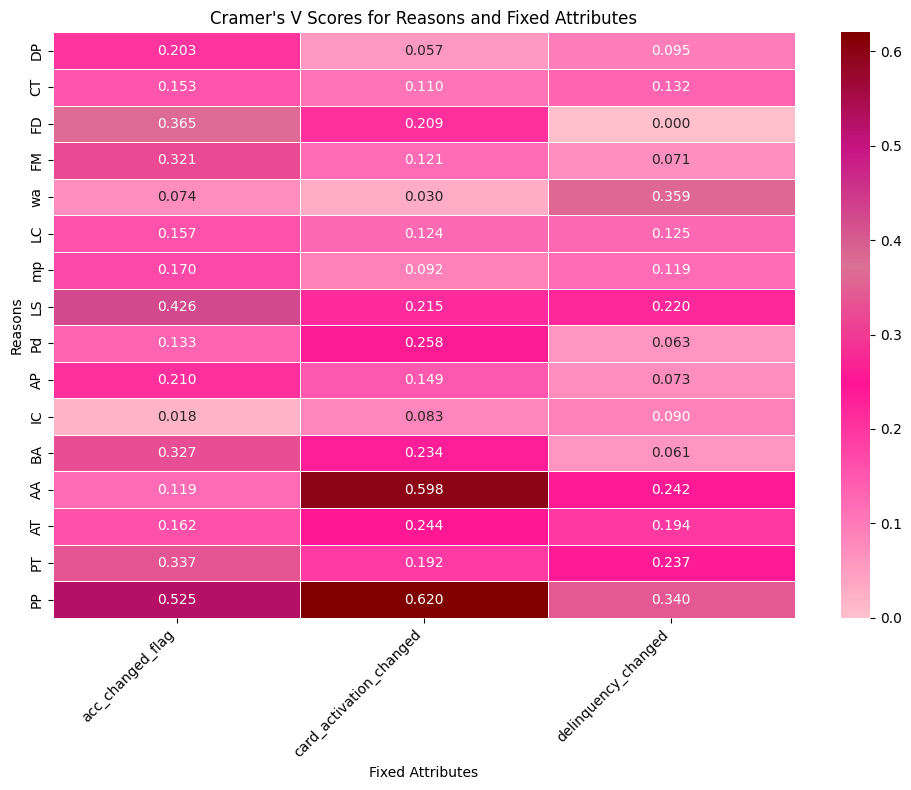

In [29]:
import matplotlib.colors as mcolors

colors = ["#FFC0CB", "#FF69B4", "#FF1493", "#DB7093", "#C71585", "#800000"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom", colors)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap=custom_cmap, annot=True, fmt=".3f", linewidths=0.5)
plt.title("Cramer's V Scores for Reasons and Fixed Attributes")
plt.xlabel("Fixed Attributes")
plt.ylabel("Reasons")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Clusters for MOS

In [30]:
duplicated_serials = combined_df[combined_df['serial'].duplicated(keep=False)]
value_counts = duplicated_serials['serial'].value_counts()
max_recalls = value_counts.max()
print(max_recalls)

values_with_max_recalls = value_counts[value_counts == max_recalls].index
rows_with_max_recalls = duplicated_serials[duplicated_serials['serial'].isin(values_with_max_recalls)]
num_unique_recalls = duplicated_serials["serial"].nunique()
print(num_unique_recalls)
print(len(combined_df) - combined_df["serial"].nunique())

47
214468
290795


In [31]:
print(combined_df["reason"].nunique())
combined_df["date"] = [int(value[0:6]) for value in combined_df['timestamp_call_key']]
combined_df['recalls'] = combined_df.groupby('serial')['serial'].transform('size')
combined_df['same_day_recalls'] = combined_df.groupby(['date', 'serial'])['serial'].transform('size')

serial_sorted = combined_df.sort_values(by='serial')

73


In [32]:
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.utils import resample

contingency_table = pd.crosstab(combined_df['reason'], combined_df['same_day_recalls'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("P-value:", p)
print(chi2)

P-value: 0.0
48912.47605537181


In [33]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramer_v_score = cramers_v(combined_df['reason'], combined_df['same_day_recalls'])
print(cramer_v_score)

0.03834893829433789


In [34]:
from scipy.stats import f_oneway
result = f_oneway(*(combined_df['recalls'][combined_df['reason'] == category] for category in combined_df['reason'].unique()))

print("ANOVA F-statistic:", result.statistic)
print("ANOVA p-value:", result.pvalue)

ANOVA F-statistic: 2030.3885303352404
ANOVA p-value: 0.0


In [35]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

combined_df.dropna(subset=['reason', 'recalls'], inplace=True)
combined_df['recalls'] = pd.to_numeric(combined_df['recalls'], errors='coerce')

reason_recalls = combined_df.groupby('reason')['recalls'].sum().sort_values(ascending=False)
reason_label_mapping = {reason: i for i, reason in enumerate(reason_recalls.index)}
combined_df['reason_encoded'] = combined_df['reason'].map(reason_label_mapping)

print(reason_label_mapping)

{'BA': 0, 'PP': 1, 'PT': 2, 'AT': 3, 'AA': 4, 'CT': 5, 'FD': 6, 'wa': 7, 'LS': 8, 'LC': 9, 'IC': 10, 'IA': 11, 'mp': 12, 'DP': 13, 'Pd': 14, 'AP': 15, 'mn': 16, 'CA': 17, 'FM': 18, 'WA': 19, 'PI': 20, 'RV': 21, 'RC': 22, 'CB': 23, 'RP': 24, 'PA': 25, 'SP': 26, 'PS': 27, 'iR': 28, 'me': 29, 'GA': 30, 'iL': 31, 'DR': 32, 'MP': 33, 'eL': 34, 'RI': 35, 'FR': 36, 'SR': 37, 'eY': 38, 'PC': 39, 'eP': 40, 'eA': 41, 'CD': 42, 'FI': 43, 'eR': 44, 'DE': 45, 'iM': 46, 'mP': 47, 'BL': 48, 'ER': 49, 'iA': 50, 'CS': 51, 'LW': 52, 'VP': 53, 'VA': 54, 'RS': 55, 'iP': 56, 'iS': 57, 'eB': 58, 'iO': 59, 'm-': 60, 'AU': 61, 'OB': 62, 'iF': 63, 'eS': 64, 'Ls': 65, 'mt': 66, 'ss': 67, 'iT': 68, 'mm': 69, 'HI': 70, 'NU': 71, 'mo': 72}


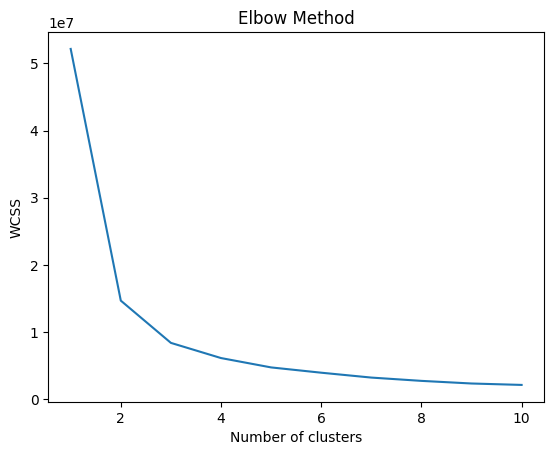

In [36]:
X = combined_df[['reason_encoded', 'recalls']]

wcss = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

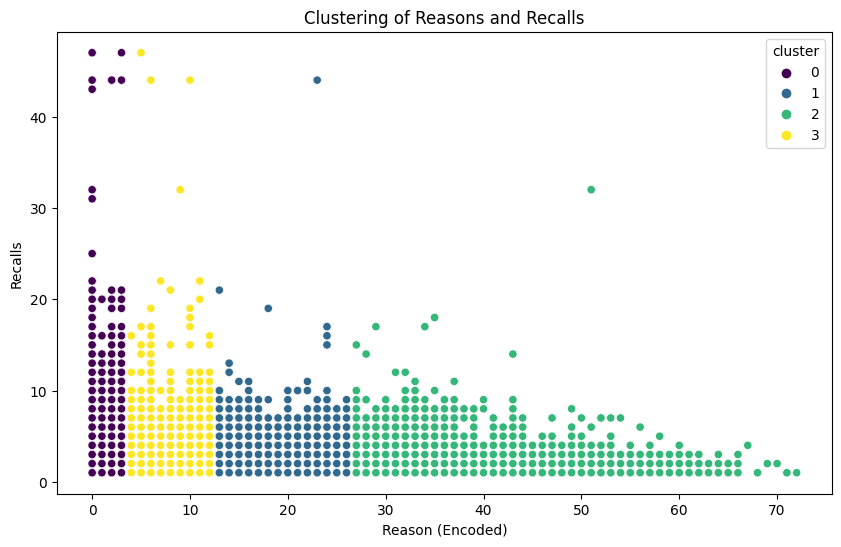

In [37]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)
combined_df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=combined_df, x='reason_encoded', y='recalls', hue='cluster', palette='viridis')
plt.xlabel('Reason (Encoded)')
plt.ylabel('Recalls')
plt.title('Clustering of Reasons and Recalls')
plt.show()

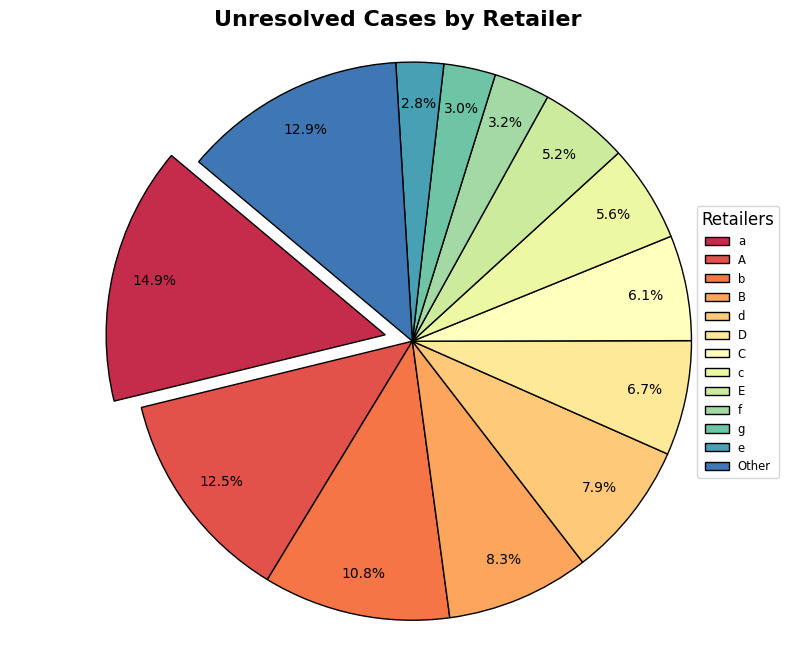

In [38]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

unresolved_df = combined_df[combined_df['resolved'] == 'floor']
unresolved_counts = unresolved_df.groupby('retailer_code').size()
unresolved_counts = unresolved_counts.sort_values(ascending=False)

total_count = unresolved_counts.sum()
cutoff_value = 0.02 * total_count

small_slices = unresolved_counts[unresolved_counts < cutoff_value]
other_slice = small_slices.sum()

unresolved_counts = unresolved_counts[unresolved_counts >= cutoff_value]
unresolved_counts['Other'] = other_slice

palette = sns.color_palette("Spectral", n_colors=13)
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.figure(figsize=(10, 8)) 
plt.pie(unresolved_counts, autopct='%1.1f%%', startangle=140, colors=palette, explode = explode, wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)
plt.legend(unresolved_counts.index, loc="right", fontsize="small", title="Retailers", title_fontsize='large')  
plt.title('Unresolved Cases by Retailer', fontsize=16, fontweight='bold', color='black') 
plt.axis('equal')  
plt.show()

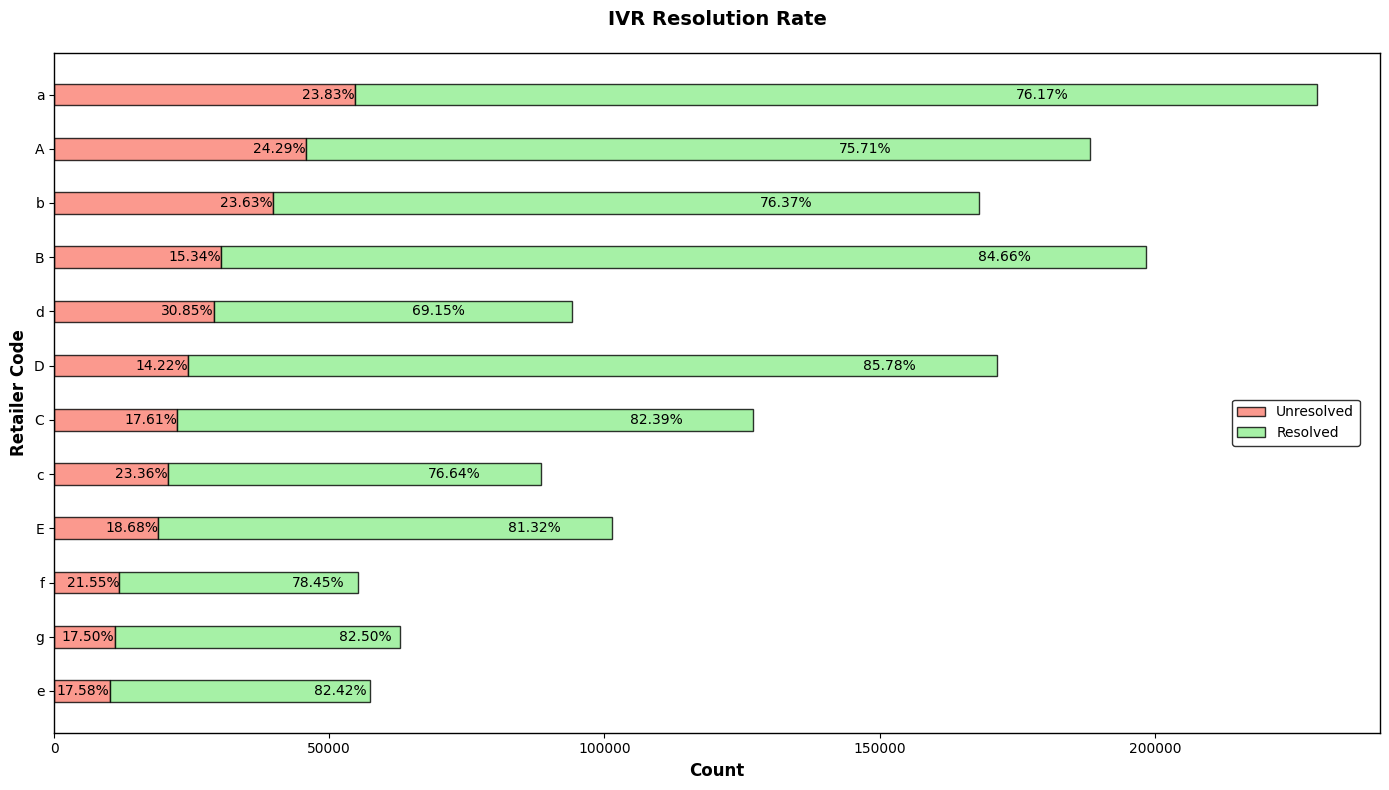

In [39]:
df = combined_df.copy()
df['resolved'] = df['resolved'].map({'resolved': True, 'floor': False})
grouped = df.groupby(['retailer_code', 'resolved']).size().unstack(fill_value=0)
grouped_filtered = grouped[grouped.sum(axis=1) > 50000]
grouped_sorted = grouped_filtered.sort_values(by=False, ascending=False)

grouped_sorted = grouped_sorted.iloc[::-1]
plt.figure(figsize=(14, 8))

bar_height = 0.4  
y = np.arange(len(grouped_sorted))

bars1 = plt.barh(y, grouped_sorted[False], height=bar_height, label='Unresolved', color='salmon', edgecolor='black', alpha=0.8)
bars2 = plt.barh(y, grouped_sorted[True], left=grouped_sorted[False], height=bar_height, label='Resolved', color='lightgreen', edgecolor='black', alpha=0.8)

plt.ylabel('Retailer Code', fontsize=12, fontweight='bold')  
plt.xlabel('Count', fontsize=12, fontweight='bold')  
plt.title('IVR Resolution Rate', pad=20, fontsize=14, fontweight='bold')  
plt.yticks(y, grouped_sorted.index)


legend = plt.legend(loc='upper right', bbox_to_anchor=(0.99, 0.50))
legend.get_frame().set_linewidth(1)  
legend.get_frame().set_edgecolor('black')  

for spine in plt.gca().spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    plt.text(bar2.get_width(), bar2.get_y() + bar2.get_height() / 2, f'{grouped_sorted[True].iloc[i] / (grouped_sorted[False].iloc[i] + grouped_sorted[True].iloc[i]):.2%}', 
             va='center', ha='left', color='black')
    plt.text(bar1.get_width(), bar1.get_y() + bar1.get_height() / 2, f'{grouped_sorted[False].iloc[i] / (grouped_sorted[False].iloc[i] + grouped_sorted[True].iloc[i]):.2%}', 
             va='center', ha='right', color='black')

plt.tight_layout()
plt.show()